In [317]:
from io import StringIO
import geopandas as gpd
import json
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from pathlib import Path
from requests import get
from shapely.ops import cascaded_union
import yaml
import requests_cache

requests_cache.install_cache('demo_cache')

In [318]:
y1, x1 = 62.0, 35.0
y0, x0 = 34.0, -11.0
europe =   {"geometry": {
           "type": "Polygon",
           "coordinates": [
             [ 
               [x0, y0], 
               [x0, y1], 
               [x1, y1],
               [x1, y0], 
               [x0, y0] 
             ]
             ]
         },
         "properties": {
           "prop0": "value0",
           "prop1": {"this": "that"}
           }
         }
eu_area = gpd.read_file(StringIO(json.dumps(europe)))
eu_area = eu_area.set_crs("EPSG:4326")
europe

{'geometry': {'type': 'Polygon',
  'coordinates': [[[-11.0, 34.0],
    [-11.0, 62.0],
    [35.0, 62.0],
    [35.0, 34.0],
    [-11.0, 34.0]]]},
 'properties': {'prop0': 'value0', 'prop1': {'this': 'that'}}}

In [319]:
maps = lambda:yaml.safe_load(Path("mappe.yaml").read_text())['maps']

# https://gisco-services.ec.europa.eu/distribution/v2/countries/distribution/BA-region-10m-3857-2020.geojson
def area(label):
    coord_type = 3857
    coord_type = 4326
    base = "https://gisco-services.ec.europa.eu/distribution/v2"
    
    if isinstance(label, int):
        return get(f'http://polygons.openstreetmap.fr/get_geojson.py?id={label}&params=0')
    
    if label.startswith("http"):
        return get(label)
    
    
    for db, year in (("nuts",2021), ("countries", 2020)):
        ret = get(
            f"{base}/{db}/distribution/{label}-region-10m-{coord_type}-{year}.geojson"
        )
        if ret.status_code == 200:
            break
        print(f'cannot find {ret.url}')
    return ret


def area_frame(label):
    return gpd.read_file(area(label).content.decode())


def join_areas(areas):
    area_frames = [area_frame(label) for label in areas]
    ret = gpd.GeoSeries(cascaded_union([x.geometry[0] for x in area_frames]))
    #ret = ret.set_crs("EPSG:4326")
    return ret # .to_crs("EPSG:4326")
def render(areas, facecolor1="blue", facecolor2="blue", edgecolor="white"):
    for i,t in enumerate(areas):
      t = t.intersection(eu_area)
      t.plot(ax=ax, edgecolor="white", facecolor=facecolor1,  linewidth=2)
      t.plot(ax=ax, edgecolor="white", facecolor=facecolor2,  linewidth=0, alpha=0.5)  
      #t.plot(edgecolor=edgecolor, facecolor="none", ax=ax)


def get_state(state):
    territori = maps()[state]['territori']
    return [join_areas(v) for k,v in territori.items()]
    
    
def render_state(state):
    state_area = get_state(state)
    color_config =  maps()[state]['config']
    render(state_area, **color_config)
    return state_area
%matplotlib qt

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of le

cannot find https://gisco-services.ec.europa.eu/distribution/v2/nuts/distribution/BA-region-10m-4326-2021.geojson


/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of le

cannot find https://gisco-services.ec.europa.eu/distribution/v2/nuts/distribution/BY-region-10m-4326-2021.geojson


/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

/home/rpolli/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: CRS mismatch between the CRS of le

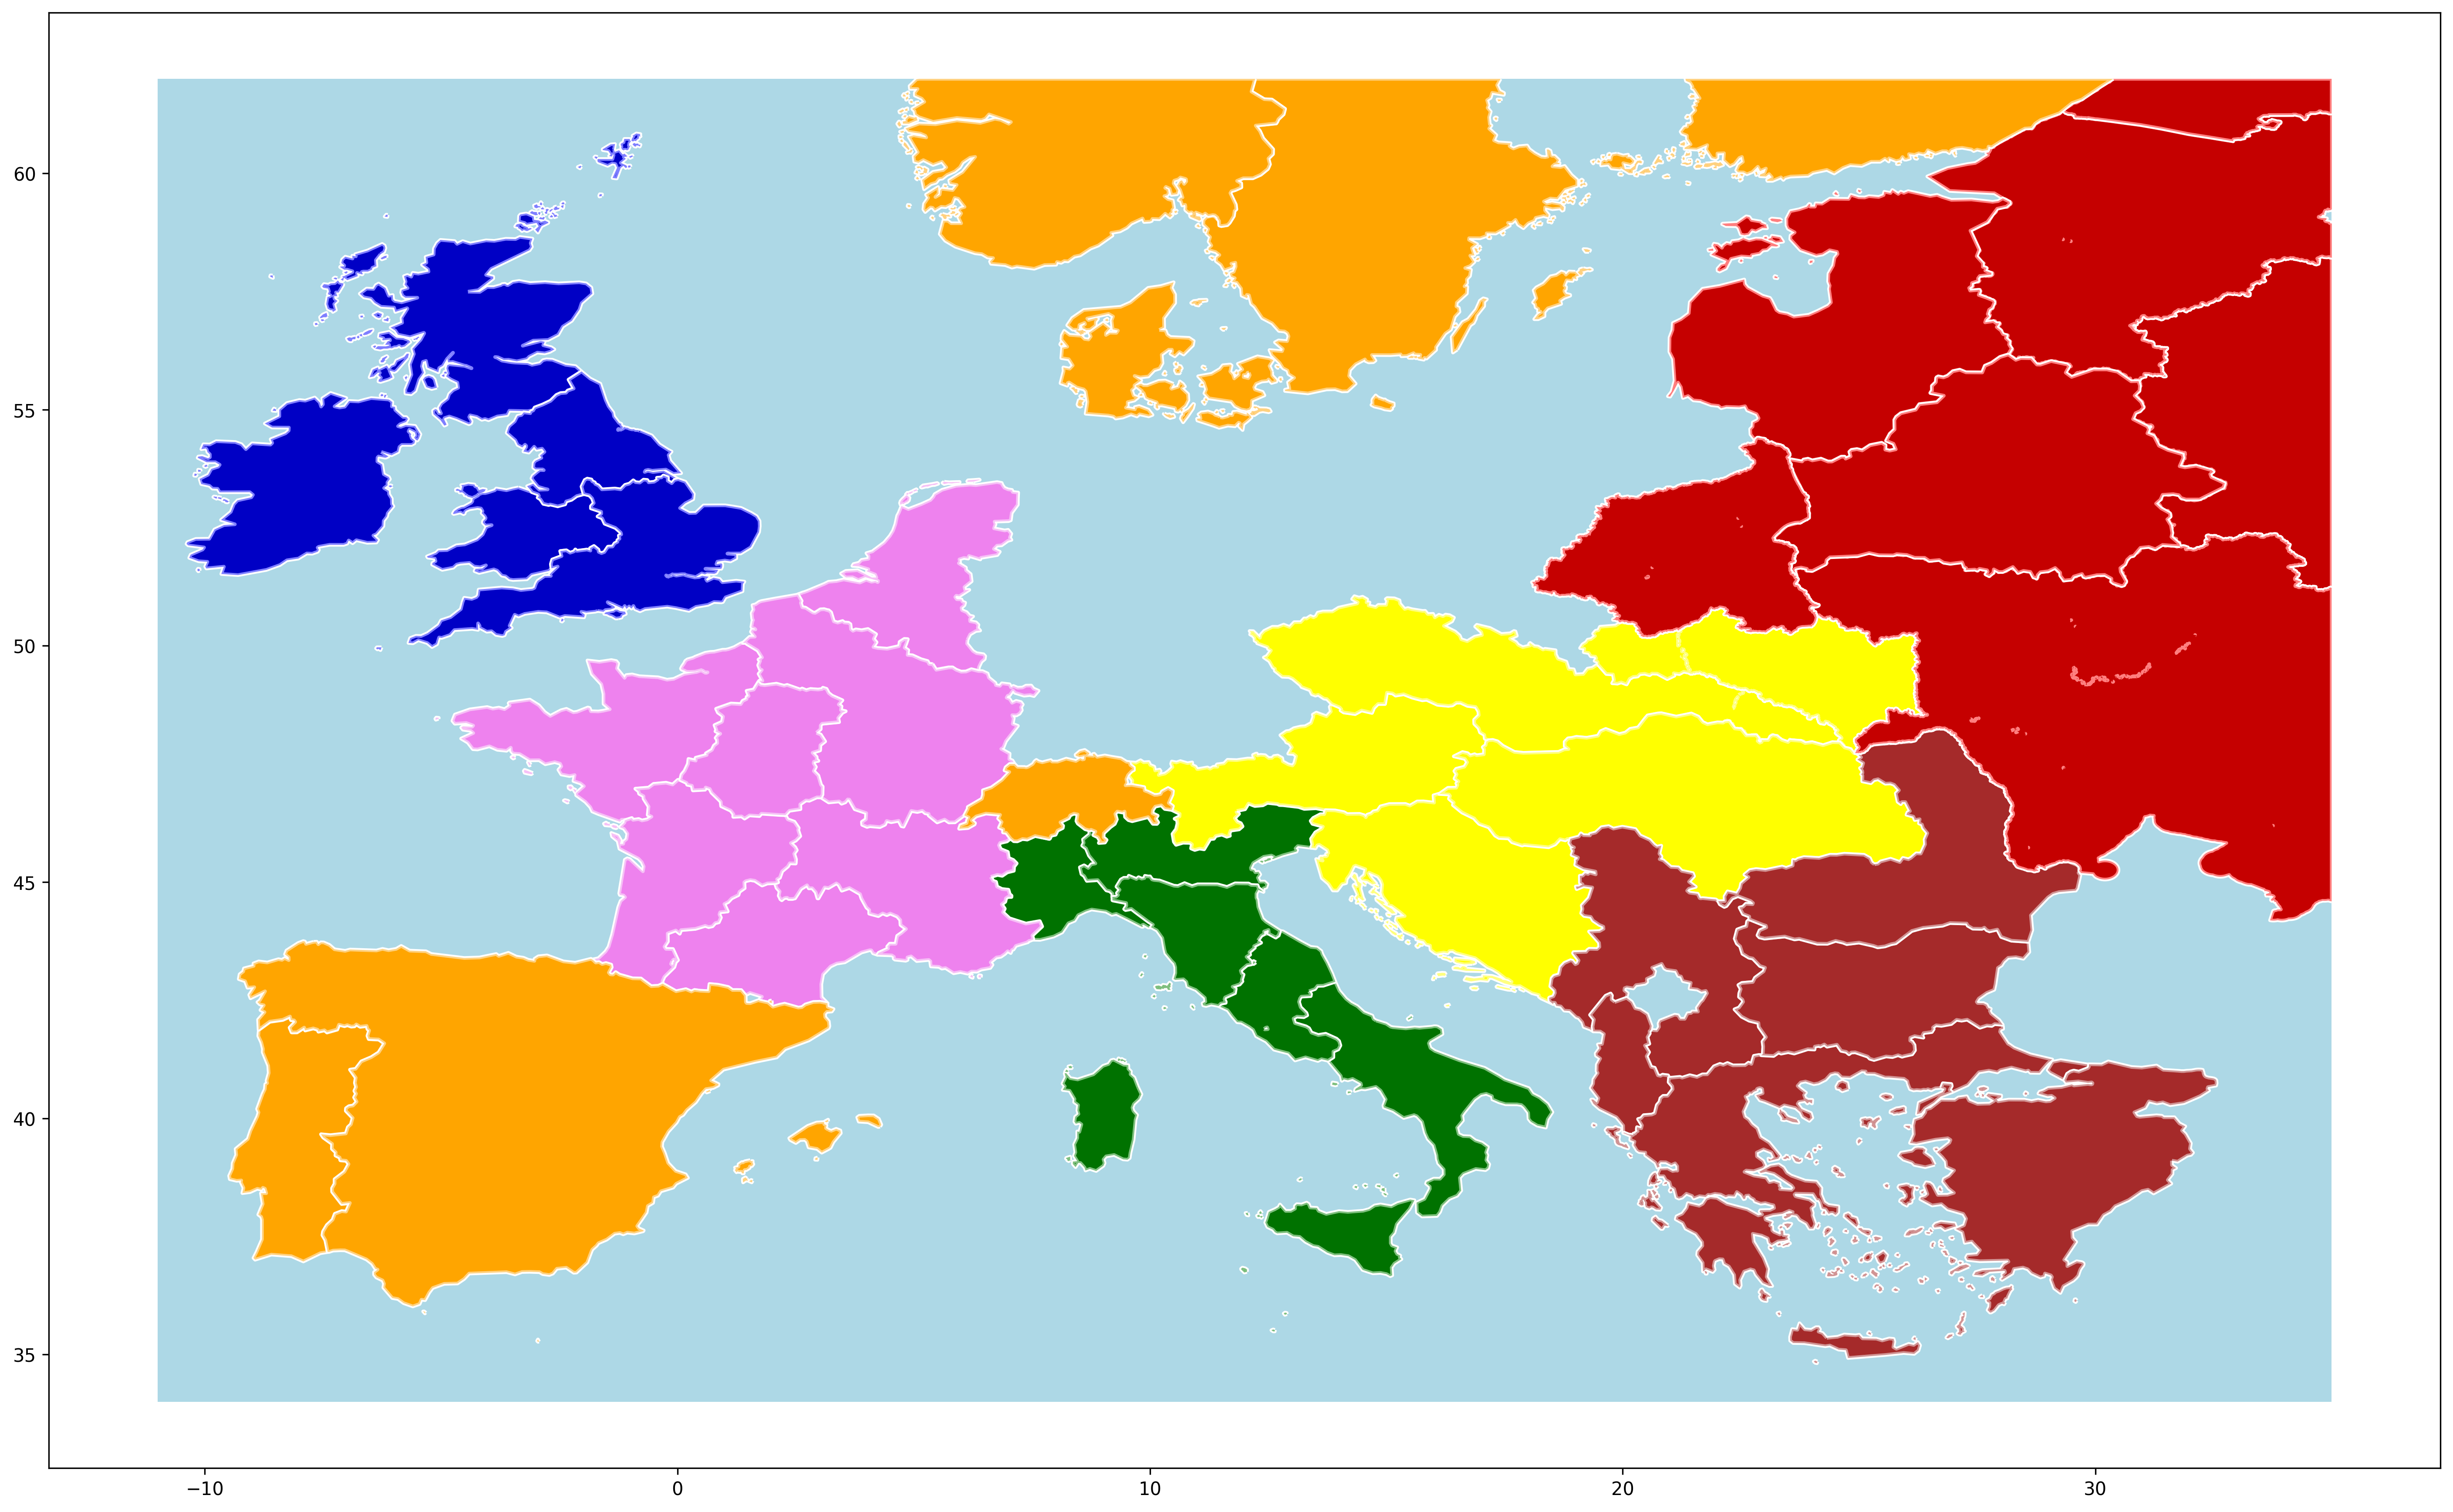

In [323]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1,1)
fig.set_size_inches(23.62, 16,53)
fig.set_dpi(300)
eu_area.plot(ax=ax, facecolor="lightblue")

for l in ('Italia', 'France', 'Asburgici', 'Ottomano', 'Russia', 'Regno Unito', 'Indipendenti'):
    render_state(l)


In [324]:
fig.savefig('/tmp/risk.png', dpi=300)

In [240]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on

### import contextily as ctx


In [83]:
ctx.add_basemap(ax)

/home/rpolli/.local/lib/python3.7/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 21 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

In [84]:
ax.plot()


[]

In [85]:
r =get_state('Russia')

cannot find https://gisco-services.ec.europa.eu/distribution/v2/nuts/distribution/BY-region-10m-4326-2021.geojson
cannot find https://gisco-services.ec.europa.eu/distribution/v2/nuts/distribution/MD-region-10m-4326-2021.geojson


In [93]:
t=r[0]
t.to_csv()


',0\n0,"MULTIPOLYGON (((31.5420536 52.4721899, 31.5391419 52.472711, 31.5373389 52.474441, 31.5331329 52.485655, 31.5355369 52.486075, 31.5513078 52.4854123, 31.5704699 52.484607, 31.5743319 52.483874, 31.5776748 52.4819934, 31.5787099 52.481411, 31.5817139 52.478214, 31.5816279 52.476432, 31.5810269 52.474022, 31.5767349 52.463905, 31.5756199 52.463014, 31.5666069 52.466002, 31.5648049 52.469147, 31.5619729 52.476223, 31.5494409 52.474074, 31.5455789 52.472292, 31.5429179 52.472082, 31.5420536 52.4721899)), ((42.6371347 54.5578336, 42.6413988 54.5587059, 42.6423436 54.5593353, 42.644045 54.5605478, 42.6447826 54.5610571, 42.6463052 54.5604149, 42.6480124 54.5606917, 42.6493194 54.5601287, 42.649242 54.5597916, 42.64917 54.5594791, 42.6500636 54.5595889, 42.653862 54.5570198, 42.6548196 54.5572209, 42.6557452 54.5559354, 42.6570442 54.55521, 42.658586 54.5541117, 42.6587567 54.5539895, 42.6583511 54.5528458, 42.6581955 54.5528022, 42.6581123 54.5527602, 42.6580104 54.5527478, 42.657720

cannot find https://gisco-services.ec.europa.eu/distribution/v2/nuts/distribution/BY-region-10m-4326-2021.geojson


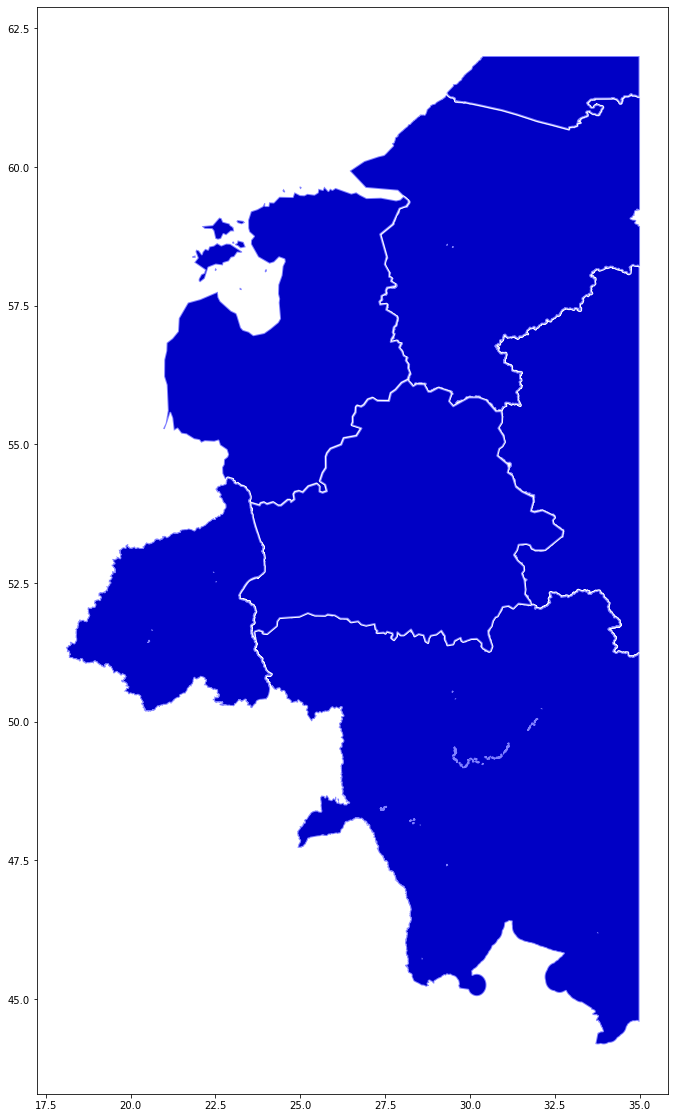

In [312]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(20,20)
russia = get_state('Russia')
for s in russia:
    s = s.set_crs("EPSG:4326")
    s1 = s.intersection(eu_area)
    
    #s1=s
    s1.plot(ax=ax1, facecolor="dark" + "blue", edgecolor="white", linewidth=2)
    s1.plot(ax=ax1, facecolor="blue", edgecolor="white", linewidth=0, alpha=0.5)

<AxesSubplot:>

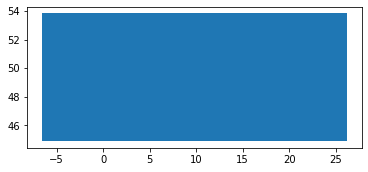

In [104]:
eu_area.plot()